In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Dataset was downloaded from Kaggle

In [2]:
data = pd.read_csv('/content/Datafiniti_Hotel_Reviews.csv')
data.info()
data.head(2)
data.columns
data.index
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateAdded             10000 non-null  object 
 2   dateUpdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primaryCategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalCode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews.date          10000 non-null  object 
 15  reviews.dateSeen    

,latitude,longitude,reviews.rating
count,10000.000000,10000.000000,10000.000000
mean,37.003630,-92.675934,4.034265
std,5.517273,19.347989,1.162240
min,19.438604,-159.474930,1.000000
25%,33.927588,-111.622343,3.350000
50%,37.785060,-84.452114,4.000000
75%,40.416380,-77.052700,5.000000
max,70.133620,-68.203990,5.000000


In [3]:
# check on missing data
data.isnull().sum()

id                         0
dateAdded                  0
dateUpdated                0
address                    0
categories                 0
primaryCategories          0
city                       0
country                    0
keys                       0
latitude                   0
longitude                  0
name                       0
postalCode                 0
province                   0
reviews.date               0
reviews.dateSeen           0
reviews.rating             0
reviews.sourceURLs         0
reviews.text               1
reviews.title              1
reviews.userCity        5836
reviews.userProvince    7295
reviews.username           0
sourceURLs                 0
websites                   0
dtype: int64

In [4]:
# Delete the two columns that contain large missing data, and the column 'id' as well
df = data.drop(['reviews.userCity', 'reviews.userProvince', 'id'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dateAdded           10000 non-null  object 
 1   dateUpdated         10000 non-null  object 
 2   address             10000 non-null  object 
 3   categories          10000 non-null  object 
 4   primaryCategories   10000 non-null  object 
 5   city                10000 non-null  object 
 6   country             10000 non-null  object 
 7   keys                10000 non-null  object 
 8   latitude            10000 non-null  float64
 9   longitude           10000 non-null  float64
 10  name                10000 non-null  object 
 11  postalCode          10000 non-null  object 
 12  province            10000 non-null  object 
 13  reviews.date        10000 non-null  object 
 14  reviews.dateSeen    10000 non-null  object 
 15  reviews.rating      10000 non-null  float64
 16  revie

In [5]:
df.head(2)

,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,...,province,reviews.date,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,websites
0,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,...,CA,2013-11-14T00:00:00Z,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,...,CA,2014-07-06T00:00:00Z,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com


In [6]:
df['reviews.text'].iloc[:3]

0    Our experience at Rancho Valencia was absolute...
1    Amazing place. Everyone was extremely warm and...
2    We booked a 3 night stay at Rancho Valencia to...
Name: reviews.text, dtype: object

In [ ]:
# Data cleaning and pre-processing

In [7]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
ps = PorterStemmer()
sw = stopwords.words('english')
sw = set(sw)

In [10]:
# Remove punctuation
df['review'] = df['reviews.text'].str.translate(str.maketrans('','', string.punctuation))

In [11]:
# Standardize the text to lowercase
df['review'] = df['review'].str.lower()

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
# tokenize text
from nltk.tokenize import word_tokenize
df['review'] = [nltk.word_tokenize(str(comment)) for comment in df['review']]

In [18]:
# remove stopwords and stem text
corpus = []
review = df['review']
len(review)
for i in range(len(review)):
	words = review[i]
	words = [ps.stem(word) for word in words if word not in sw]
	words = ' '.join(words)
	corpus.append(words)

In [20]:
# check the result
corpus[:3]

['experi rancho valencia absolut perfect begin end felt special happi stay would come back heart beat',
 'amaz place everyon extrem warm welcom weve stay top notch place definit top 2 great romant getaway take kid along coupl stuf anim wait girl upon arriv cant wait go back',
 'book 3 night stay rancho valencia play tenni sinc one highest rate tenni resort america place realli top luxuri standpoint overal experi villa realli perfect staff great attent detail includ fresh squeez orang juic morn restaur bar room servic amaz tenni program realli impress well want come back']

In [29]:
from textblob import TextBlob

In [27]:
# create a column that shows whether the review is positive, negative or neutral
df['review'] = corpus
def subjectivity(text):
	return TextBlob(text).sentiment.subjectivity

def polarity(text):
	return TextBlob(text).sentiment.polarity

In [30]:
df['subjectivity'] = df['review'].apply(subjectivity)

In [31]:
df['polarity'] = df['review'].apply(polarity)

In [32]:
def analysis(score):
	if score < 0:
		return 'Negative'
	elif score == 0:
		return 'Neutral'
	else:
		return 'Positive'

In [33]:
df['analysis'] = df['polarity'].apply(analysis)

In [34]:
df['analysis'][:20]

0     Positive
1     Positive
2     Positive
3     Negative
4     Positive
5      Neutral
6     Positive
7     Positive
8     Negative
9     Negative
10    Positive
11    Positive
12    Positive
13    Positive
14    Positive
15    Positive
16    Positive
17    Positive
18    Negative
19    Positive
Name: analysis, dtype: object

In [35]:
df['analysis'].value_counts()

Positive    8597
Negative     861
Neutral      542
Name: analysis, dtype: int64

In [36]:
# print the top 5 positive reviews
rank = df.sort_values(by='polarity', ascending=False)
rank['review'][:5]

3273                                  one best hotel stay
7870                          stay coupl around area best
9038    sierra vista 8 month work govt contract fort h...
5410    extend stay accommod perfect locat hotel take ...
5261    decid go littl getaway weekend chimney rock un...
Name: review, dtype: object

In [37]:
# print the top 5 negative reviews
rank = df.sort_values(by='polarity', ascending=True)
rank['review'][:5]

7440    one worst hotel ever stay could wait leav morn...
8248    absolut horribl look afford place stay weekend...
9801                  worst hotel experi ever seedi place
5959    check trip advisor stay besid dirti hole bed l...
2393    worst place ever famili room smelli offic staf...
Name: review, dtype: object

Text(0, 0.5, 'Subjectivity')

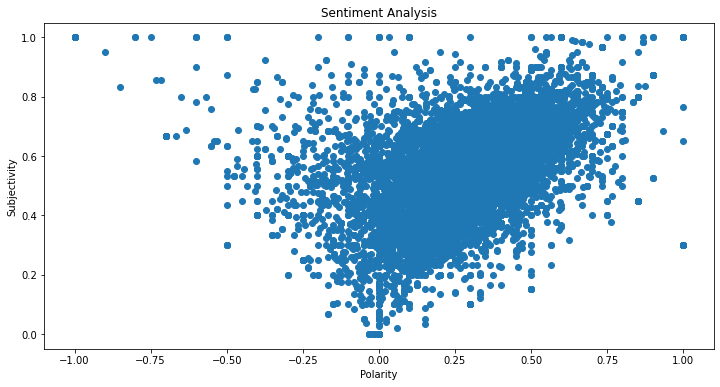

In [39]:
#plot the subjectivity and polarity 
plt.figure(figsize=(12,6))
plt.scatter('polarity', 'subjectivity', data=df)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

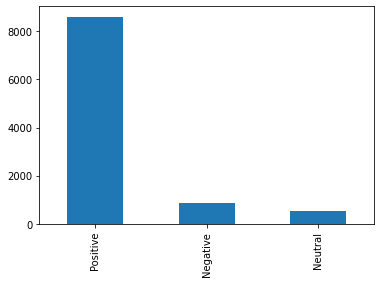

In [40]:
#show the number of positive, negative and neutral reviews
df['analysis'].value_counts().plot(kind='bar')